In [1]:
# Dependencies
import requests
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pprint import pprint
from sodapy import Socrata


# Ignore Warnings as we are rewrititng values 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the csv file using pandas and creating a dataframe 
df_bike_cl = pd.read_csv("Clean_Data/out.csv")
# displaying the top rows of the dataframe 
df_bike_cl.head(1)

,Bicycle ID,Checkout Date,Checkout Station,Checkout Station ID,Checkout Time,Membership Type,Trip Month,Return Station,Return Station ID,Trip Duration Minutes,Trip ID,Trip Year,Trip Date,Trip Day of Week,Trip Hour
0,207.0,2014-10-26,West & 6th St.,2537.0,13:12:00,year,10,Rainey St @ Cummings,2707.0,76,9900285854,2014,26,Sunday,13


### Each ride includes 
- Trip ID
- Membership Type
- Checkout Date,Time,Station Name 
- Return Station Name
- Duration of the Trip


### We start the trend analysis with a year by year breakdown of the B-Cycle utilization.

   Year  Total Number of Rides 
0  2013                    1457
1  2014                  155415
2  2015                  184207
3  2016                  184505
4  2017                  193488
5  2018                  271410


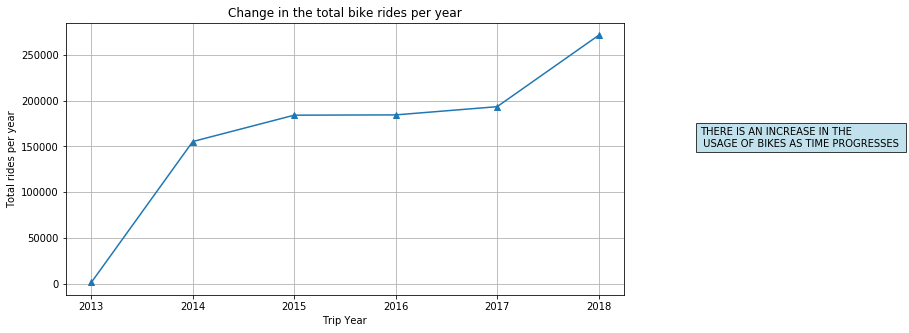

In [6]:
# 
df_bike_year = df_bike_cl.groupby('Trip Year')
number_of_rides_per_year = df_bike_year['Trip ID'].count()
rides_per_year_df = pd.DataFrame(data = number_of_rides_per_year,index = None).reset_index()
rides_per_year_df = rides_per_year_df.rename(columns = {"Trip Year":"Year","Trip ID":"Total Number of Rides "})
print(rides_per_year_df)
# Plot the total number of rides per year using line graph
Total_rides_per_year_chart = number_of_rides_per_year.plot(kind = "line",grid=True,marker='^',title = "Change in the total bike rides per year",figsize = (10,5))                                                                                                             
Total_rides_per_year_chart.set_xlabel("Trip Year")
Total_rides_per_year_chart.set_ylabel("Total rides per year")
plt.text(2019,150000,"THERE IS AN INCREASE IN THE \n USAGE OF BIKES AS TIME PROGRESSES ",bbox=dict(facecolor='lightblue',alpha =0.75))
plt.savefig("Images/Rides_per_Year.png",bbox_inches = "tight")
plt.show()

## Month by Month breakdown of the B-Cycle utilization.

In [7]:
# As we dont have records for all the month for the year 2013 and 2018 we excluded them and calculated from the year 2014 to 2017
df_month = df_bike_cl.loc[(df_bike_cl["Trip Year"] >= 2014) & (df_bike_cl["Trip Year"] <= 2017),:]
df_bike_month = df_month['Trip Month'].value_counts()
df_bike_month



3     111774
10     90177
5      69564
7      61475
6      60186
9      57748
4      53314
11     52268
8      49125
1      43736
2      42018
12     26230
Name: Trip Month, dtype: int64

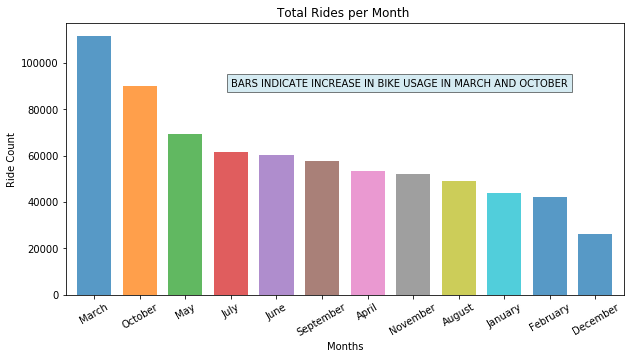

In [8]:
# plot the graph for Total Rides per Month(try to add percentage )
import calendar
mn=[calendar.month_name[int(x)] for x in df_bike_month.index.values.tolist()]
bike_chart = df_bike_month.plot.bar(title = "Total Rides per Month ",width = 0.75,figsize = (10,5),rot = 30,alpha = 0.75 )
bike_chart.set_xticklabels(mn)
bike_chart.set_xlabel("Months")
bike_chart.set_ylabel("Ride Count")
plt.text(3,90000,"BARS INDICATE INCREASE IN BIKE USAGE IN MARCH AND OCTOBER",bbox=dict(facecolor='lightblue',alpha =0.5))
plt.savefig("Images/Rides_per_Month.png")
plt.show()


## Let's analyze which day has the highest B-cycle utilization


In [9]:
busy_day = df_bike_cl['Trip Day of Week'].value_counts()
busy_day

Saturday     196583
Sunday       162296
Friday       154650
Monday       125486
Thursday     124186
Wednesday    114329
Tuesday      112952
Name: Trip Day of Week, dtype: int64

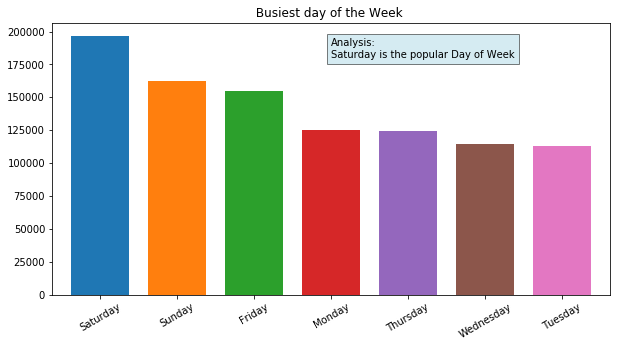

In [10]:
# plot the graph for busiest day of the week 
plt.xlabel = "Days of a week "
plt.ylabel = "Ride count"
week_chart = busy_day.plot(kind = "bar" , title = " Busiest day of the Week  ",width = 0.75,figsize = (10,5),rot = 30)
plt.text(3,180000,"Analysis:\nSaturday is the popular Day of Week",bbox=dict(facecolor='lightblue',alpha =0.5))
plt.savefig("Images/Busy_Week.png")
plt.show()


## Analyze and Display The  Busiest hours of the day 


In [11]:
busy_hour = df_bike_cl['Trip Hour'].value_counts()
busy_hour

17    84076
16    83470
15    83337
13    82408
14    81684
12    76837
18    71035
11    63669
19    56549
10    48313
20    43194
9     39589
21    35189
8     33557
22    27511
23    18739
7     16761
0     13662
1     10068
2      8794
6      5704
3      2820
5      1955
4      1561
Name: Trip Hour, dtype: int64

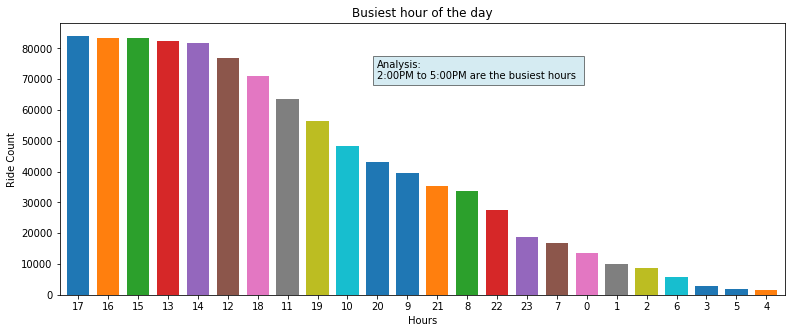

In [12]:
# plot the graph for busiest hour of the day 
hour_chart = busy_hour.plot(kind = "bar" , title = "Busiest hour of the day",width = 0.75,figsize = (13,5),rot = 0)
hour_chart.set_xlabel("Hours")
hour_chart.set_ylabel("Ride Count")
plt.text(10,70000,"Analysis:\n2:00PM to 5:00PM are the busiest hours ",bbox=dict(facecolor='Lightblue',alpha =0.5))
plt.savefig("Images/Busy_Hour.png")
plt.show()


Text(0.5,0,'Hour (24H clock)')

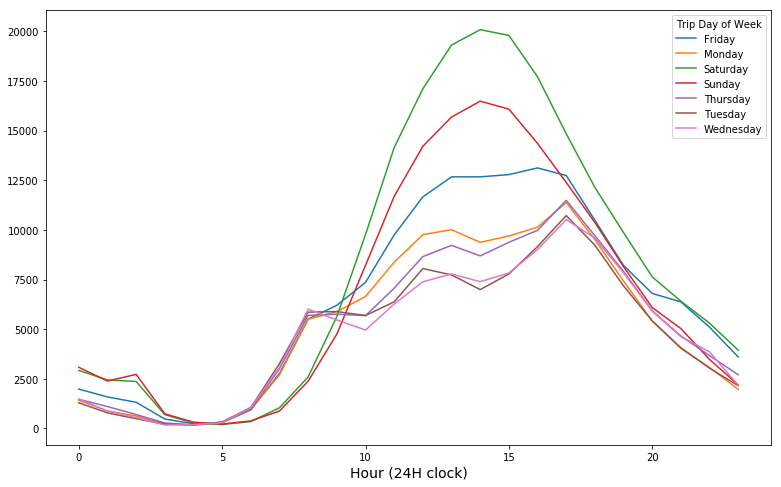

In [13]:
# Now plot the data, since we have the top 6 membership types now group by Year and display
fig, ax = plt.subplots(figsize=(13,8))
# Without unstack, the rows are displayed seperately. 
df_bike_cl.groupby(['Trip Hour','Trip Day of Week']).count()['Trip ID'].unstack().plot(ax=ax)
ax.set_xlabel('Hour (24H clock)', fontdict={'size' : 14})


##  Analyze most popular stations  and Display top 6


In [14]:
popular_checkout_station = df_bike_cl['Checkout Station'].value_counts()
popular_checkout_station.sort_values(ascending = False).head(6)

21st & Speedway @PCL        42166
Riverside @ S. Lamar        36963
City Hall / Lavaca & 2nd    34570
2nd & Congress              33363
5th & Bowie                 32389
Rainey St @ Cummings        31658
Name: Checkout Station, dtype: int64

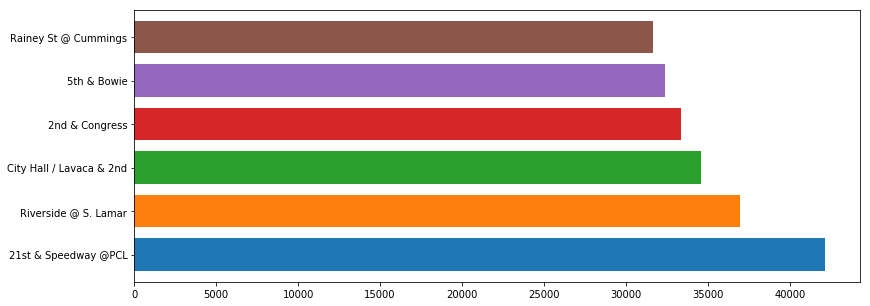

In [15]:
# plot the graph for the popular stations 
pop_station_chart = popular_checkout_station[0:6].plot(kind = "barh",width = 0.75,figsize = (13,5))
plt.savefig("Images/Pop_Station.png")
plt.show()

###   The above  stations  receive significantly more rentals than any other area. These are all  located  around UT Campus 

## Analyze  Popular Membership types and Display Top 6



In [16]:
popular_membership_type = df_bike_cl['Membership Type'].value_counts() 
popular_membership_type.head(10)

Walk Up    374340
year       216566
student    161804
day        125192
month       55605
weekend     44780
3 year       6319
week         5876
Name: Membership Type, dtype: int64

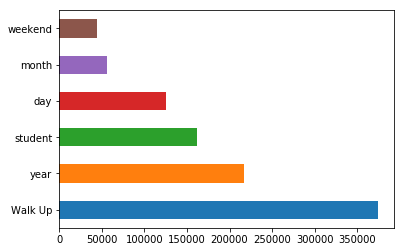

In [17]:
# plot the graph for the popular mebership types 
popular_membership_type[0:6].plot(kind = "barh")

## Analyze the trends in membership types over the years and display the top 6 

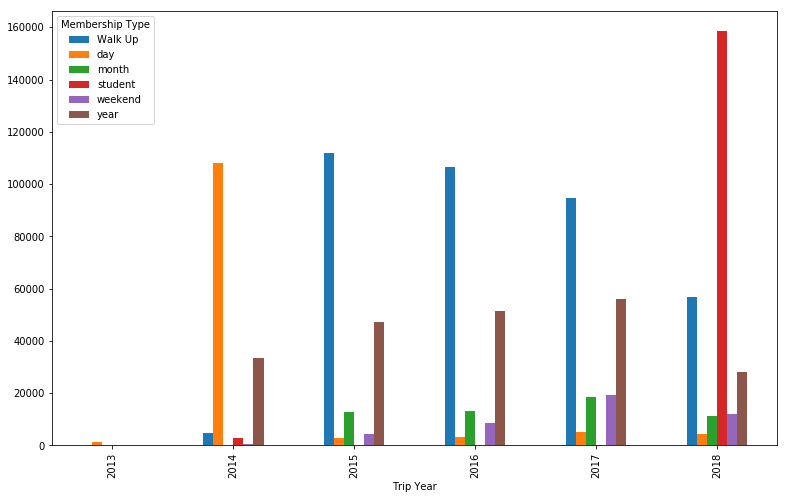

In [18]:
# find the popular member ship types
mem_type_df = df_bike_cl.groupby(["Membership Type"],as_index=True).size()
mem_type_df = mem_type_df.sort_values(ascending=False)

#select the data for the top 6 memberships 
mem_type_year = []

for memtype in mem_type_df[:6].to_dict():
    #print(memtype)
    df_temp = df_bike_cl.loc[df_bike_cl["Membership Type"]==memtype]
    mem_type_year.append(df_temp)
    
mem_type_year_df = pd.concat(mem_type_year)

# Now plot the data, since we have the top 6 membership types now group by Year and display
fig, ax = plt.subplots(figsize=(13,8))
# Without unstack, the rows are displayed seperately. 
mem_type_year_df.groupby(['Trip Year','Membership Type']).count()['Trip ID'].unstack().plot.bar(ax=ax)


## UT student membership have clearly become the most popular type as a result of                      18-month UT campus  free student  pilot program

 ## Are the  special events in austin affecting bike rides
 ## Analysis during SXSW 
- SXSW Dates 
    - SXSW 2018 - March 12 to March 18 2018
    - SXSW 2017 - Mar 10, 2017 – Mar 19, 2017
    - SXSW 2016 - Mar 11, 2016 – Mar 20, 2016
    - SXSW 2015 - Mar 13, 2015 – Mar 23, 2015
    - SXSW 2014 - Mar 7, 2014 – Mar 17, 2014
    - SXSW 2013 - March 8 2013 - March 18 2013

In [20]:
# calcualte total number of rides during SXSW for year 2018
df_bike_2018 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2018), : ]
df_bike_2018_march = df_bike_2018.loc[(df_bike_2018["Trip Month"] == 3), : ]
df_bike_2018_march_SXSW = df_bike_2018_march.loc[(df_bike_2018_march["Trip Date"] >= 12)& (df_bike_2018_march["Trip Date"] <= 18), : ]
number_of_rides_SXSW_2018 = df_bike_2018_march_SXSW['Trip ID'].count()

# calcualte total number of rides during SXSW for year 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_march = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 3), : ]
df_bike_2017_march_SXSW = df_bike_2017_march.loc[(df_bike_2017_march["Trip Date"] >= 10)& (df_bike_2017_march["Trip Date"] <= 19), : ]
number_of_rides_SXSW_2017 = df_bike_2017_march_SXSW['Trip ID'].count()

# calcualte total number of rides during SXSW for year 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016)]
df_bike_2016_march = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 3), : ]
df_bike_2016_march_SXSW = df_bike_2016_march.loc[(df_bike_2016_march["Trip Date"] >= 11)& (df_bike_2016_march["Trip Date"] <= 20), : ]
number_of_rides_SXSW_2016 = df_bike_2016_march_SXSW['Trip ID'].count()

# calcualte total number of rides during SXSW for year 2015
df_bike_2015 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2015)]
df_bike_2015_march = df_bike_2015.loc[(df_bike_2015["Trip Month"] == 3), : ]
df_bike_2015_march_SXSW = df_bike_2015_march.loc[(df_bike_2015_march["Trip Date"] >= 13)& (df_bike_2015_march["Trip Date"] <= 23), : ]
number_of_rides_SXSW_2015 = df_bike_2015_march_SXSW['Trip ID'].count()

# calcualte total number of rides during SXSW for year 2014
df_bike_2014 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2014)]
df_bike_2014_march = df_bike_2014.loc[(df_bike_2014["Trip Month"] == 3), : ]
df_bike_2014_march_SXSW = df_bike_2014_march.loc[(df_bike_2014_march["Trip Date"] >= 13)& (df_bike_2014_march["Trip Date"] <= 23), : ]
number_of_rides_SXSW_2014 = df_bike_2014_march_SXSW['Trip ID'].count()



## Analysis during ACL

- ACL Dates 
    - ACL 2018 - Oct 5, 2018 – Oct 14, 2018
    - ACL 2017 - Oct 6, 2017 – Oct 15, 2017
    - ACL 2016 -  Sep 30, 2016 – Oct 9, 2016
    - ACL 2015 - Oct 2, 2015 – Oct 11, 2015
    - ACL 2014 - 10/3-5 and 10/10-12, 2014
    - ACL 2013 - October 4-6 and 11-13 ,2013

In [21]:
# Calculate number of bike rides during ACL 2017 
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_oct = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 10), : ]
df_bike_2017_oct_acl = df_bike_2017_oct.loc[(df_bike_2017_oct["Trip Date"] >= 6)& (df_bike_2017_oct["Trip Date"] <= 15), : ]
number_of_rides_acl_2017 = df_bike_2017_oct_acl['Trip ID'].count()


# Calculate number of bike rides during ACL 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_oct = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 10), : ]
df_bike_2016_oct_acl = df_bike_2016_oct.loc[ (df_bike_2016_oct["Trip Date"] <= 9), : ]
number_of_rides_oct_acl_2016 = df_bike_2016_oct_acl['Trip ID'].count()

df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_sept = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 9), : ]
df_bike_2016_sept_acl = df_bike_2016_sept.loc[ (df_bike_2016_sept["Trip Date"] >= 30), : ]
number_of_rides_sept_acl_2016 = df_bike_2016_sept_acl['Trip ID'].count()

number_of_rides_acl_2016 = number_of_rides_oct_acl_2016 + number_of_rides_sept_acl_2016


# Calculate number of bike rides during ACL 2015
df_bike_2015 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2015), : ]
df_bike_2015_oct = df_bike_2015.loc[(df_bike_2015["Trip Month"] == 10), : ]
df_bike_2015_oct_acl = df_bike_2015_oct.loc[(df_bike_2015_oct["Trip Date"] >= 2)& (df_bike_2015_oct["Trip Date"] <= 11), : ]
number_of_rides_acl_2015 = df_bike_2015_oct_acl['Trip ID'].count()


# Calculate number of bike rides during ACL 2014
df_bike_2014 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2014), : ]
df_bike_2014_oct = df_bike_2014.loc[(df_bike_2014["Trip Month"] == 10), : ]
df_bike_2014_oct_acl = df_bike_2014_oct.loc[((df_bike_2014_oct["Trip Date"] >= 3)& (df_bike_2014_oct["Trip Date"] <= 5)) | ((df_bike_2014_oct["Trip Date"] >= 10)& (df_bike_2014_oct["Trip Date"] <= 12)), : ]
number_of_rides_acl_2014 = df_bike_2014_oct_acl['Trip ID'].count()




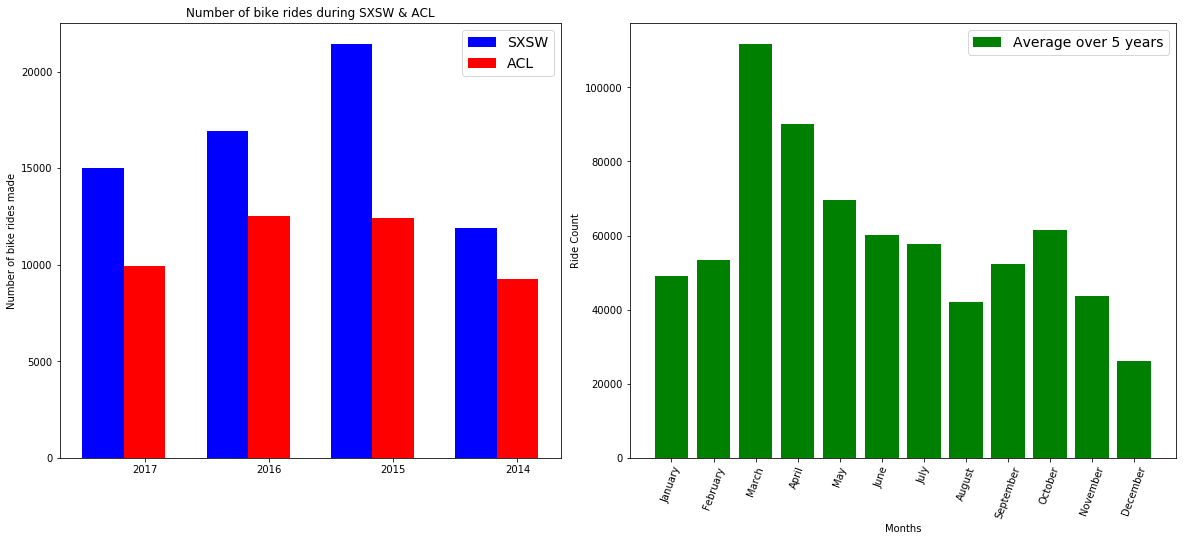

In [23]:
## At the time of SXSW 2013 Austin B-Cycle wasn't intoduced
## As we are doing this analysis in august we don't have records for ACL 2018
## plot the total rides during  ACL and SXSW from 2014 to 2017

data_SXSW = [number_of_rides_SXSW_2017, number_of_rides_SXSW_2016, number_of_rides_SXSW_2015
           , number_of_rides_SXSW_2014]
data_ACL = [number_of_rides_acl_2017, number_of_rides_acl_2016, number_of_rides_acl_2015
          , number_of_rides_acl_2014]

x_axis1 = np.arange(len(data_SXSW))
x_axis2 = np.arange(len(data_ACL))

#Calculate optimal width
width = np.min(np.diff(x_axis1))/3
monthly_bike = df_bike_month.tolist()
months =  df_bike_cl['Trip Month'].value_counts().index

import matplotlib.gridspec as Gridspec
fig1 = plt.figure(figsize=[20,8])
gs = Gridspec.GridSpec(100,100)
ax1 = fig1.add_subplot(gs[:,0:45])
ax2 = fig1.add_subplot(gs[:,51:100])
ax1.bar(x_axis1-width, data_SXSW,width,color='b',label='SXSW')
ax1.bar(x_axis2, data_ACL,width,color='r',label='ACL')
plt.setp(ax1, xticks=[0, 1, 2,3], xticklabels=["2017", "2016", "2015", "2014"])
ax1.set_title('Number of bike rides during SXSW & ACL')
ax1.set_ylabel("Number of bike rides made")
ax1.legend(loc=1, prop={'size': 14})


ax2.bar(months, monthly_bike,color='g',label='Average over 5 years')
ax2.set_xlabel("Months")
plt.setp(ax2, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], xticklabels=['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December'])
ax2.set_ylabel("Ride Count")
ax2.legend(loc=1, prop={'size': 14})
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=70 )
fig1.show()

In [63]:
##### UBER BAN
# Date May 9 2016 - May 29 2017 
# # To calculate the number of rides during UBER BAN in 2017

## Number of bike rides during May 1st to May 29th 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_may = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 5), : ]
df_bike_2017_may_uber_ban = df_bike_2017_may.loc[(df_bike_2017_may["Trip Date"] <= 29), : ]
number_of_rides_uber_ban_2017 = df_bike_2017_may_uber_ban['Trip ID'].count()
# Number of bike rides from Jan 1st to 30th April 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_till_april_uber_ban = df_bike_2017.loc[(df_bike_2017["Trip Month"] < 5), : ]
number_of_rides_uber_ban_2017_till_april = df_bike_2017_till_april_uber_ban['Trip ID'].count()

# Number of bike rides from Jan 1st to 30th April 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_till_april_uber_ban = df_bike_2017.loc[(df_bike_2017["Trip Month"] < 5), : ]
number_of_rides_uber_ban_2017_till_april = df_bike_2017_till_april_uber_ban['Trip ID'].count()

## Number of bike rides during June 1st to Dec 31st 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_till_june_uber_ban = df_bike_2016.loc[(df_bike_2016["Trip Month"] >= 6) & (df_bike_2016["Trip Month"] <= 12), : ]
number_of_rides_uber_ban_2016_till_august = df_bike_2016_till_june_uber_ban['Trip ID'].count()

# To calculate the number of rides from May 9th to May 31st 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_may = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 5), : ]
df_bike_2016_may_uber_ban = df_bike_2016_may.loc[(df_bike_2016_may["Trip Date"] >= 9), : ]
number_of_rides_uber_ban_2016 = df_bike_2016_may_uber_ban['Trip ID'].count()

number_of_rides_uber_ban = number_of_rides_uber_ban_2016 + number_of_rides_uber_ban_2017 + number_of_rides_uber_ban_2016_till_august+ number_of_rides_uber_ban_2017_till_april  


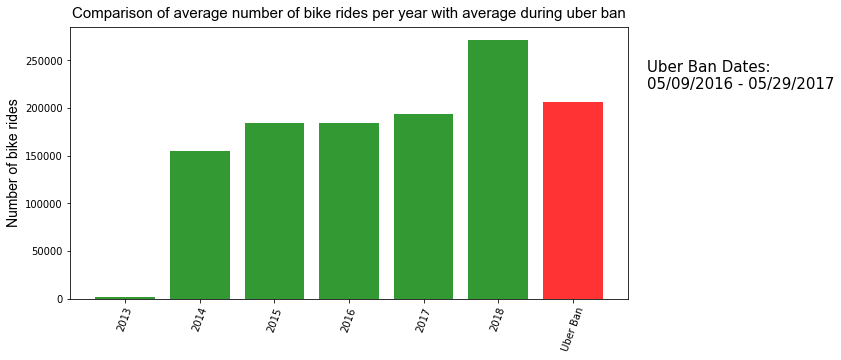

In [81]:
## The plot
number_of_rides_per_year_list = number_of_rides_per_year.tolist()
axis_font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
fig, ax = plt.subplots(figsize=(10, 5))
y_value1 = number_of_rides_per_year_list
x_axis1 = np.arange(len(number_of_rides_per_year_list))
x_axis2 = [6]
bars1 = ax.bar(x_axis1, y_value1, color='g', alpha=0.8, align="center")
bars2 = ax.bar(x_axis2, number_of_rides_uber_ban, color='r', alpha=0.8, align="center")
plt.setp(ax, xticks=[0, 1, 2, 3, 4, 5, 6], xticklabels=["2013", "2014", "2015", "2016", "2017", "2018", "Uber Ban"])
ax.set_ylabel("Number of bike rides", **axis_font)
ax.text(7,220000,s="Uber Ban Dates:\n05/09/2016 - 05/29/2017", fontsize=15)
ax.set_title('Comparison of average number of bike rides per year with average during uber ban', **title_font)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
plt.show()

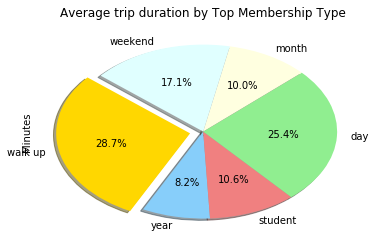

In [67]:
from matplotlib import pyplot, pylab
subscriber_type = df_bike_cl['Membership Type'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

trip_minutes = []
for element in top_subscriber_type:
   time_min = df_bike_cl[df_bike_cl['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes.append(np.mean(time_min))

x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)

plt.xticks(tick_locations, top_subscriber_type, rotation=90)
labels = ["walk up","year","student","day","month","weekend"]
explode = (0.1,0,0,0,0,0)
colors = ["gold", "lightskyblue", "lightcoral","lightgreen","lightyellow","lightcyan"]
plt.pie(trip_minutes,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Average trip duration by Top Membership Type')
pylab.ylabel('Minutes')
plt.show()

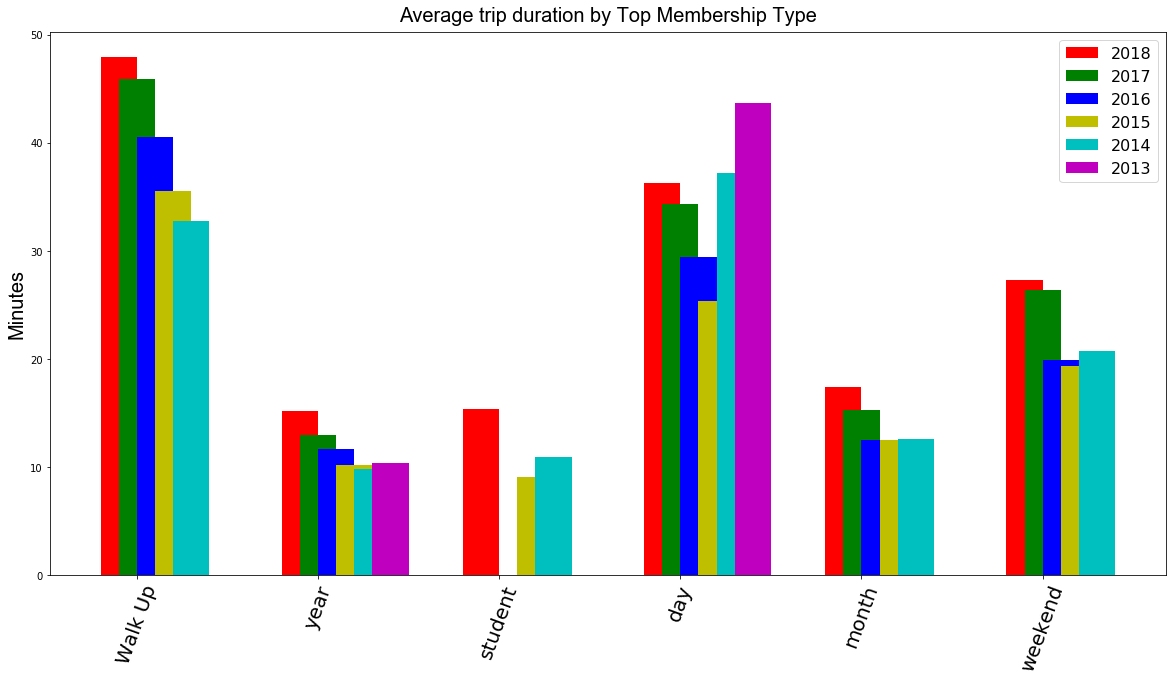

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20'}
w = 0.2
subscriber_type = df_bike_cl['Membership Type'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

## For 2018
df_bike_2018 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2018)]

trip_minutes_2018 = []
for element in top_subscriber_type:
   time_min = df_bike_2018[df_bike_2018['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2018.append(np.mean(time_min))

## For 2017

df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017)]

trip_minutes_2017 = []
for element in top_subscriber_type:
   time_min = df_bike_2017[df_bike_2017['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2017.append(np.mean(time_min))

## For 2016

df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016)]

trip_minutes_2016 = []
for element in top_subscriber_type:
   time_min = df_bike_2016[df_bike_2016['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2016.append(np.mean(time_min))

## For 2015

df_bike_2015 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2015)]

trip_minutes_2015 = []
for element in top_subscriber_type:
   time_min = df_bike_2015[df_bike_2015['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2015.append(np.mean(time_min))


## For 2014

df_bike_2014 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2014)]

trip_minutes_2014 = []
for element in top_subscriber_type:
   time_min = df_bike_2014[df_bike_2014['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2014.append(np.mean(time_min))

## For 2013

df_bike_2013 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2013)]

trip_minutes_2013 = []
for element in top_subscriber_type:
   time_min = df_bike_2013[df_bike_2013['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2013.append(np.mean(time_min))

x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)

plt.setp(ax, xticks= tick_locations, xticklabels= top_subscriber_type)
plt.setp(ax.get_xticklabels(), rotation=70, fontsize= 20)
ax.bar(x_axis-0.5*w, trip_minutes_2018,w,color='r',label='2018')
ax.bar(x_axis, trip_minutes_2017,w,color='g',label='2017')
ax.bar(x_axis+0.5*w, trip_minutes_2016,w,color='b',label='2016')
ax.bar(x_axis+1*w, trip_minutes_2015,w,color='y',label='2015')
ax.bar(x_axis+1.5*w, trip_minutes_2014,w,color='c',label='2014')
ax.bar(x_axis+2*w, trip_minutes_2013,w,color='m',label='2013')

ax.set_title('Average trip duration by Top Membership Type', **title_font)
ax.set_ylabel('Minutes', **axis_font)
ax.legend(loc=1, prop={'size': 16})
fig.show()